# Multi-sample Test (ANOVA)

**Goal:** Compare the mean value of more than 2 independent samples ($\mu_1$, $\mu_2$, ..., $\mu_k$). 

We are interested in which of the following hypotheses is supported by the data.

$$H_1: \mu_1 = \mu_2 = ... = \mu_k$$
$$H_2: \mu_1 \ne \mu_2 = ... = \mu_k$$

$$H_3: \mu_1 = \mu_2 \ne ... = \mu_k$$

$$H_4: \mu_1 = \mu_2 = ... \ne \mu_k$$

$$H_5: \mu_1 \ne \mu_2 \ne ... \ne \mu_k$$

Now that we are interested in comparing more than two samples, we will use an ANOVA instead of a t.test. In R, we will use the *aov()* function. 

We will use the *ChickWeight* built-in dataset again that we have been using for the last couple of modules. In the last module, we used a series of t-tests to compare the mean weight between chicks on different diet. With an anova we can run one test to see if the mean weight for any one group (diet) is different than any other group. The anova will not tell us which group is different, just that any one group is different. In the next module, we will learn how to tell which is the group that is different.


In [13]:
import pandas as pd
import statsmodels.stats as sms
from statsmodels.formula.api import ols

ChickWeight = pd.read_csv('../data/ChickWeight.csv')

In [15]:
# C(Diet) is used here to make Diet a Categorical variable
cw_lm = ols('weight ~ C(Diet)', data=ChickWeight).fit()
sms.anova.anova_lm(cw_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Diet),3.0,1.558627e+05,51954.219184,10.81009,6.433247e-07
Residual,574.0,2.758693e+06,4806.085833,NaN,NaN


Looking at the output of the anova, we can see that the mean weight for at least one of the groups (diets) is different than at least one of the other groups. We know this because the p-value (6.433e-07) is less than 0.05. This output tables also gives us the F statistic (10.81). 

If we want to see the coefficient values for each of the diets we can use the *summary()* function. This tells us the size of the diet effect. 

In [24]:
cw_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           6.43e-07
Time:                        06:22:37   Log-Likelihood:                -3268.2
No. Observations:                 578   AIC:                             6544.
Df Residuals:                     574   BIC:                             6562.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      102.6455      4.674     21.961      0.000      93.465     111.826
C(Diet)[T.2]    19.9712      7.867      2.538      0.011       4.519      35.424
C(Diet)[T.3]    40.3045      7.867      5.123      0.000      24.852      55.757
C(Diet)[T.4]    32.6173      7.910      4.123      0.000      17.080      48.154
==============================================================================
Omnibus:                       54.472   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.057
Skew:                           0.835   Prob(JB):                     1.67e-15
Kurtosis:                       3.187   Cond. No.                         4.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For example, in this situation diet 1 has an average weight of 102.65 grams. The effect of diet 2 is to increase weight by 19.97 grams, for diet 3 it increases weight by 40.30, and for diet 4 we see an increase in weight of 32.62 grams. 

And, we can also see the confidence intervals. 


Recall that these are the confidence intervals for the intercept is around the mean of diet 1, and the confidence intervals for diets 2-4 is the confidence intervals around the difference in means between the particular diet and diet 1. 

## Problem Set

1. Let's explore the *iris* dataset (R built-in dataset). This dataset gives us the measurements of sepal length and width and petal length and width for 50 flowers of 3 species of iris. First, create a boxplot of petal length for the 3 iris species.
2. Is there a difference in mean petal length between the 3 iris species? Use an anova to answer this question. 
3. What are the coefficient for each species and the 95% confidence intervals? Which species has the largest mean petal length?


Text(0.5,0.98,'')

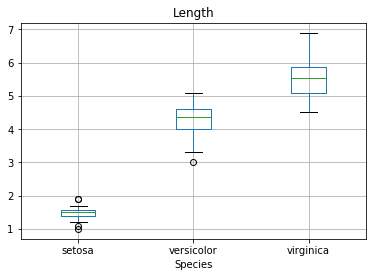

In [45]:
import matplotlib.pyplot as plt
iris = pd.read_csv('../data/iris.csv')
# make iris column names pythonic to prevent issues in future
# the issue is the '.' syntax in the naming of the columns
iris.rename(index=str, columns={"Petal.Length": "Length"}, inplace=True)

# boxplot
iris.boxplot(column=['Length'], by='Species')
# turn off annoying automatic subtitle
plt.suptitle('') 

In [49]:
iris_lm = ols('Length ~ C(Species)', data=iris).fit()
sms.anova.anova_lm(iris_lm)
# yes, p-value is <2e-16

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


In [50]:
iris_lm.summary()
# setosa - 1.462 mean petal length
# versicolor +2.798 mean petal length from setosa
# virginica +4.090 mean petal length from setosa
# virginica has the largest mean petal length

# setosa (1.34, 1.58)
# versicolor (2.63, 2.97) difference between versicolor and setosa
# virginica (3.92, 4.26) difference between virginica and setosa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1180.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.86e-91
Time:                        06:42:14   Log-Likelihood:                -84.847
No. Observations:                 150   AIC:                             175.7
Df Residuals:                     147   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4620      0.061     24.023      0.000       1.342       1.582
C(Species)[T.versicolor]     2.7980      0.086     32.510      0.000       2.628       2.968
C(Species)[T.virginica]      4.0900      0.086     47.521      0.000       3.920       4.260
==============================================================================
Omnibus:                        4.394   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.366
Skew:                           0.122   Prob(JB):                       0.0683
Kurtosis:                       3.894   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""